<a href="https://colab.research.google.com/github/krakowiakpawel9/uczenie_maszynowe/blob/master/random_forest/03_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas_datareader

In [0]:
data = pandas_datareader.stooq.StooqDailyReader('AMZN').read()

In [0]:
df = data.copy()

In [14]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-07-26,1942.00,1950.90,1924.51,1943.05,4927143.0
2019-07-25,2001.00,2001.20,1972.72,1973.82,4136461.0
2019-07-24,1969.30,2001.30,1965.87,2000.81,2631300.0
2019-07-23,1995.99,1997.79,1973.13,1994.49,2703480.0
2019-07-22,1971.14,1989.00,1958.26,1985.63,2908111.0


In [19]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-08,130.70,133.68,129.03,133.52,9826568.0
2010-01-07,131.96,132.32,128.80,130.00,11014197.0
2010-01-06,134.63,134.73,131.65,132.25,7178209.0
2010-01-05,133.25,135.48,131.81,134.69,8851066.0
2010-01-04,136.28,136.61,133.14,133.90,7595995.0


In [16]:
df.describe().apply(lambda x: round(x, 2))

,Open,High,Low,Close,Volume
count,2407.00,2407.00,2407.00,2407.00,2406.00
mean,626.17,632.36,619.06,626.06,4528455.57
std,542.61,547.56,536.44,542.25,2897285.71
min,105.93,111.29,105.80,108.61,986435.00
25%,223.92,226.60,220.22,223.14,2746269.50
50%,359.98,364.75,356.43,360.62,3810219.00
75%,849.92,853.41,845.54,848.78,5351425.00
max,2038.11,2050.50,2013.00,2039.51,42396643.00


In [21]:
df = df.dropna()
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [0]:
df = df.sort_index()

In [0]:
#df = df.reset_index()
df_train = df[df['Date'] < '2018-01-01']
df_test = df[df['Date'] > '2018-01-01']


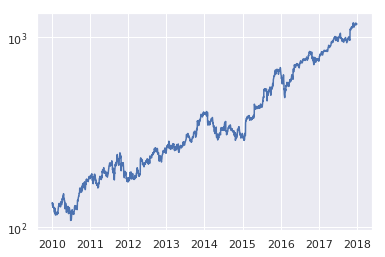

In [63]:
close = df_train['Close']
volume = df['Volume']

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.plot(df_train['Date'], close)
plt.yscale('log')

In [67]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=30, min_samples_leaf=30)
forest.fit(df_train['Date'].values.reshape(-1, 1), close)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=30, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

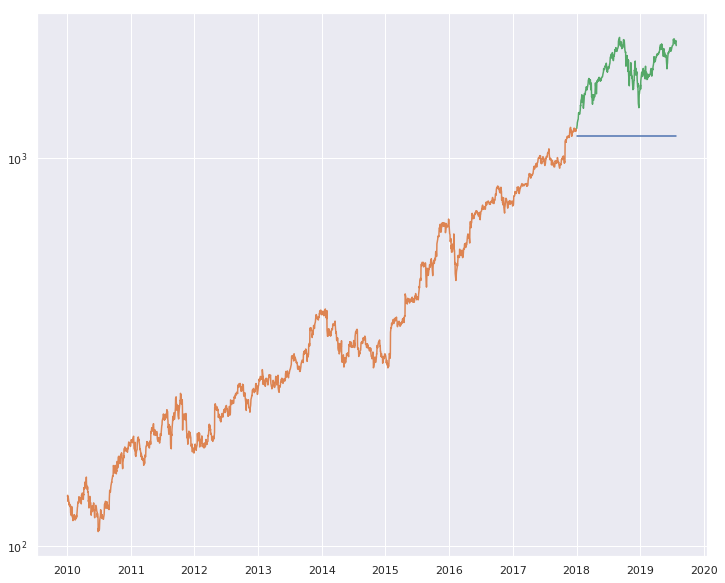

In [74]:
plt.figure(figsize=(12, 10))
plt.plot(df_test['Date'], forest.predict(df_test['Date'].values.reshape(-1, 1)))
plt.plot(df_train['Date'], close)
plt.plot(df_test['Date'], df_test['Close'])
plt.yscale('log')